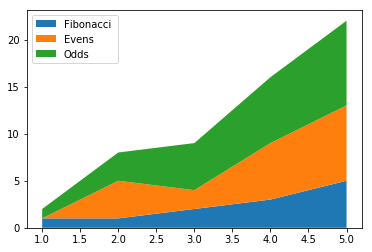

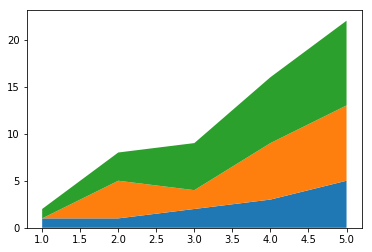

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y1 = [1, 1, 2, 3, 5]
y2 = [0, 4, 2, 6, 8]
y3 = [1, 3, 5, 7, 9]

y = np.vstack([y1, y2, y3])

labels = ["Fibonacci ", "Evens", "Odds"]

fig, ax = plt.subplots()
ax.stackplot(x, y1, y2, y3, labels=labels)
ax.legend(loc='upper left')
plt.show()

fig, ax = plt.subplots()
ax.stackplot(x, y)
plt.show()

(100, 3)
(3, 100)


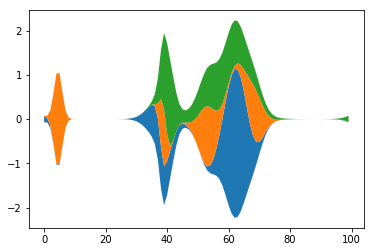

In [14]:
def layers(n, m):
    """
    Return *n* random Gaussian mixtures, each of length *m*.
    """
    def bump(a):
        x = 1 / (.1 + np.random.random())
        y = 2 * np.random.random() - .5
        z = 10 / (.1 + np.random.random())
        for i in range(m):
            w = (i / m - y) * z
            a[i] += x * np.exp(-w * w)
    a = np.zeros((m, n))
    for i in range(n):
        for j in range(5):
            bump(a[:, i])
    return a


d = layers(3, 100)
print(d.shape)
print(d.T.shape)
fig, ax = plt.subplots()
ax.stackplot(range(100), d.T, baseline='sym')
plt.show()

In [87]:
import sympy
from sympy.printing.latex import latex
from sympy.printing import pretty
from sympy import init_printing
import matplotlib.pyplot as plt
#init_printing(use_latex="mathjax") # doctest: +SKIP

"""
Symbolic solutions for the derivatives of the phytoplankton growth terms with
respect to the trait using library sympy.
"""
# variables definition
tt0, N, a, S, b, Ped, c, d, tt2, e, f, M, lnS = sympy.symbols('tt0,N,a,S,b,Ped,c,d,tt2,e,f,M,lnS')
S = sympy.exp(lnS)
trait = lnS

# derivatives of growth terms with respect to the trait
NutrientUptake = tt0*N/(N+a*S**b)

print('NutrientUptake d^2=', sympy.diff(NutrientUptake, trait, 2))
print('NutrientUptake d^3=', sympy.diff(NutrientUptake, trait, 3))
print('NutrientUptake d^4=', sympy.diff(NutrientUptake, trait, 4))

Grazing = S**c/(Ped+d)*tt2
print('Grazing d=', sympy.diff(Grazing, trait))
print('Grazing d^2=', sympy.diff(Grazing, trait, 2))

Sinking = e*S**f/M
print('Sinking d=', sympy.diff(Sinking, trait))
print('Sinking d^2=', sympy.diff(Sinking, trait, 2))

PED = S**c
a = latex(NutrientUptake, itex=True)
print(a)
sympy.diff(NutrientUptake, trait)


NutrientUptake d^2= N*a*b**2*tt0*(2*a*exp(lnS)**b/(N + a*exp(lnS)**b) - 1)*exp(lnS)**b/(N + a*exp(lnS)**b)**2
NutrientUptake d^3= -N*a*b**3*tt0*(6*a**2*exp(lnS)**(2*b)/(N + a*exp(lnS)**b)**2 - 6*a*exp(lnS)**b/(N + a*exp(lnS)**b) + 1)*exp(lnS)**b/(N + a*exp(lnS)**b)**2
NutrientUptake d^4= N*a*b**4*tt0*(24*a**3*exp(lnS)**(3*b)/(N + a*exp(lnS)**b)**3 - 36*a**2*exp(lnS)**(2*b)/(N + a*exp(lnS)**b)**2 + 14*a*exp(lnS)**b/(N + a*exp(lnS)**b) - 1)*exp(lnS)**b/(N + a*exp(lnS)**b)**2
Grazing d= c*tt2*exp(lnS)**c/(Ped + d)
Grazing d^2= c**2*tt2*exp(lnS)**c/(Ped + d)
Sinking d= e*f*exp(lnS)**f/M
Sinking d^2= e*f**2*exp(lnS)**f/M
\frac{N tt_{0}}{N + a \left(e^{lnS}\right)^{b}}


                 b 
           ⎛ lnS⎞  
-N⋅a⋅b⋅tt₀⋅⎝ℯ   ⎠  
───────────────────
                 2 
  ⎛            b⎞  
  ⎜      ⎛ lnS⎞ ⎟  
  ⎝N + a⋅⎝ℯ   ⎠ ⎠  

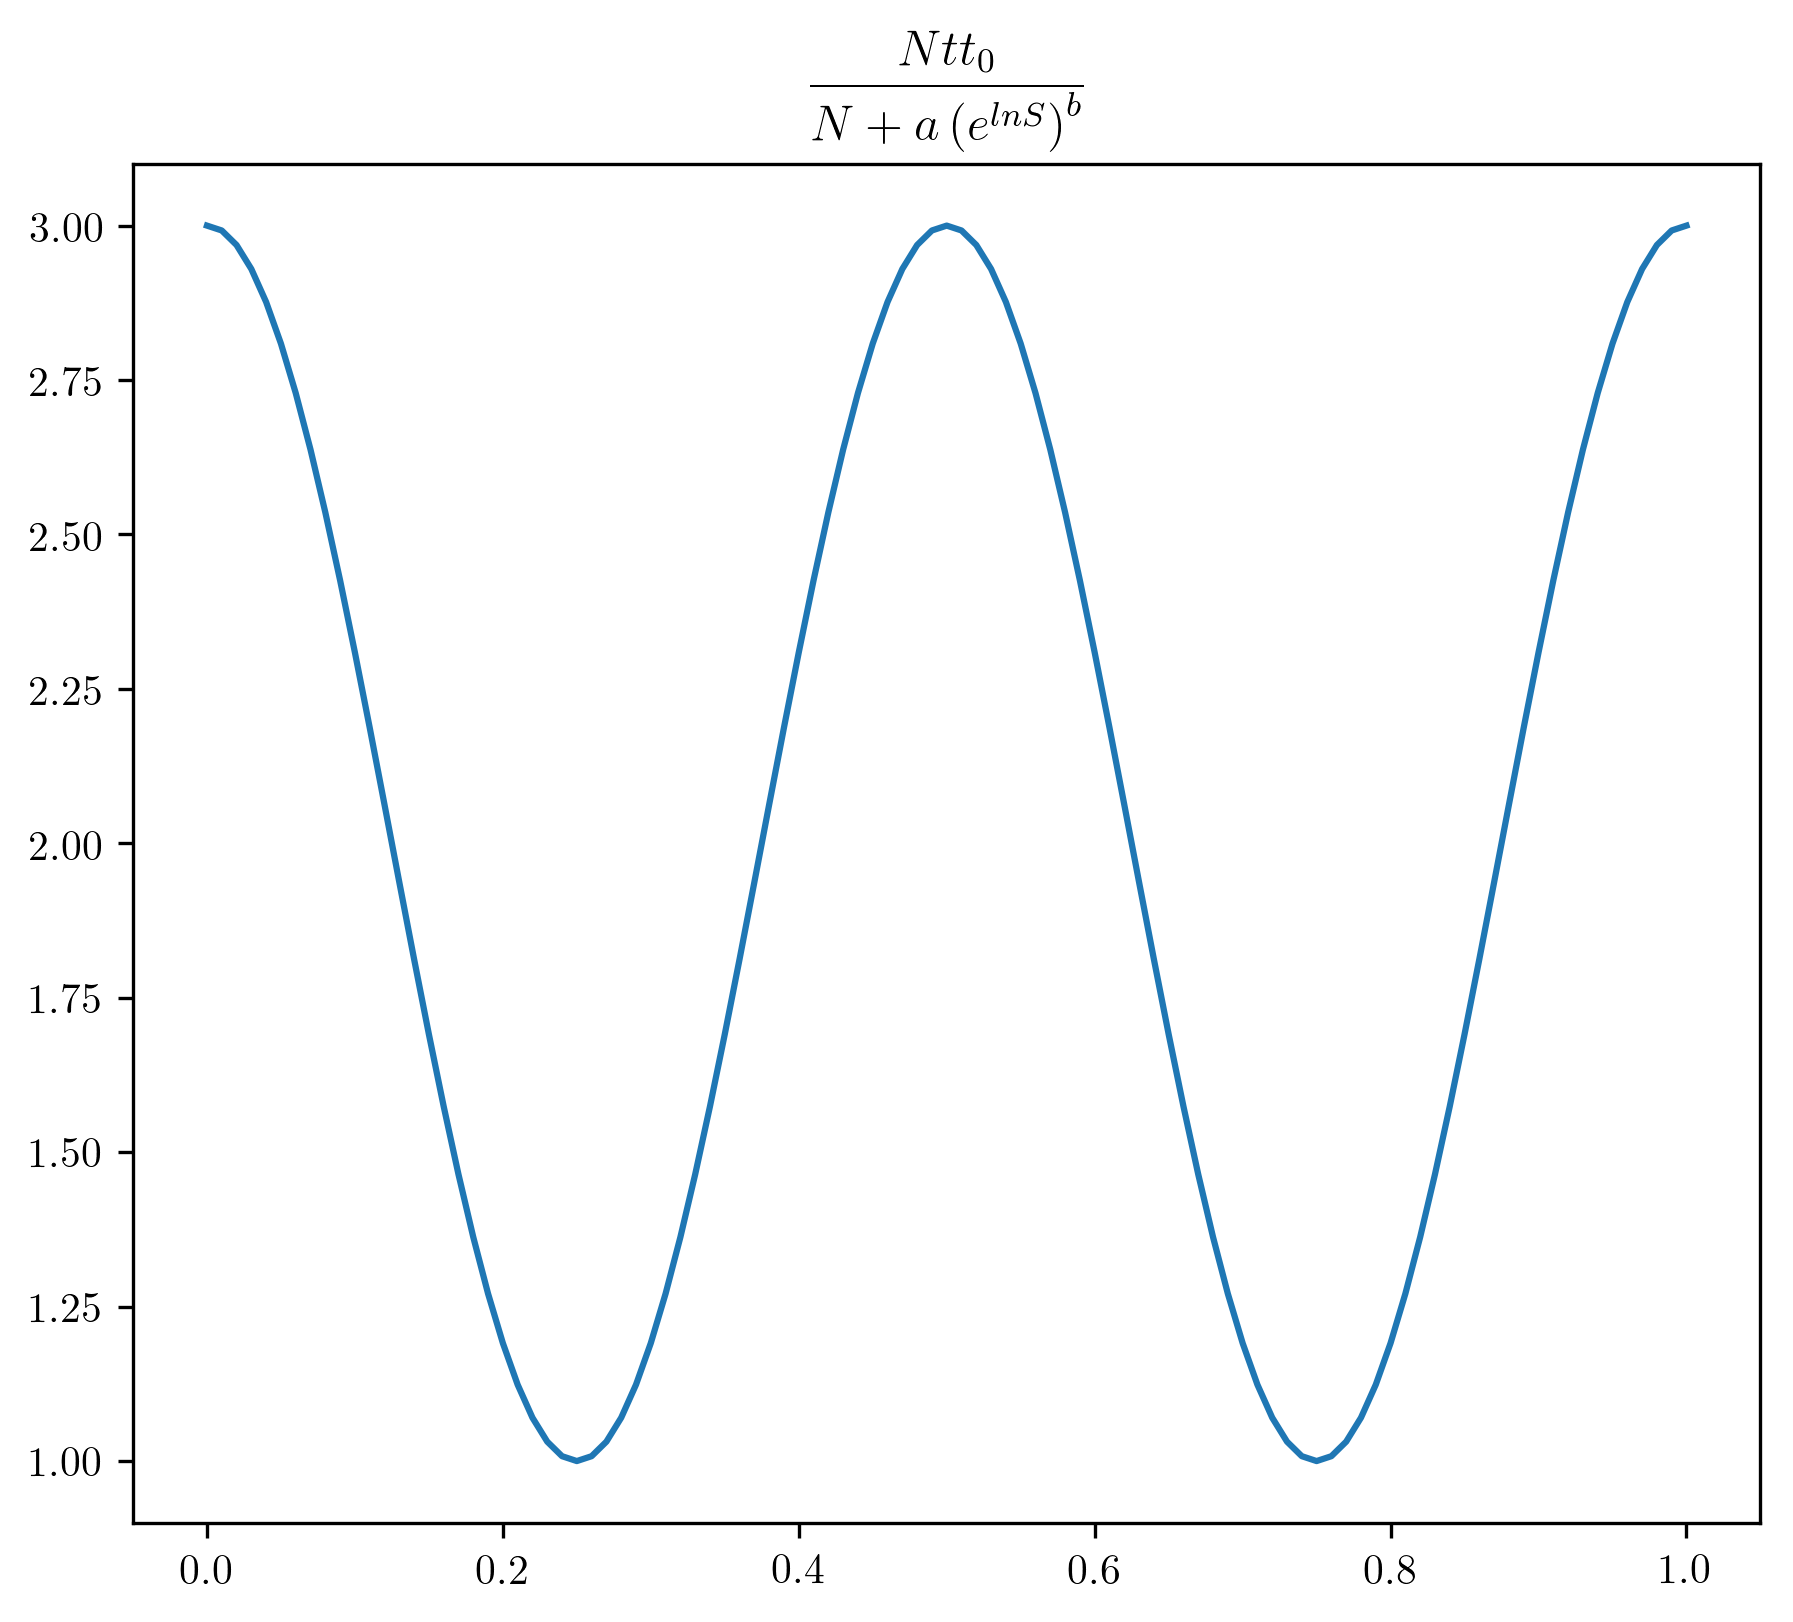

In [88]:

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

import matplotlib
matplotlib.rcParams['text.usetex'] = True

import numpy as np
import matplotlib.pyplot as plt


# Example data
t = np.arange(0.0, 1.0 + 0.01, 0.01)
s = np.cos(4 * np.pi * t) + 2

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.plot(t, s)
a1 = '$$'+str(a)+'$$'
#plt.xlabel(r'\textbf{time} (s)')
#plt.ylabel(r'\textit{voltage} (mV)',fontsize=16)
plt.title(a1)
# Make room for the ridiculously large title.
#plt.subplots_adjust(top=0.8)

#plt.savefig('tex_demo')
plt.show()

In [23]:
# make all plots larger and more visible on dark background:
plt.rcParams['figure.figsize'] = [7, 6]
plt.rc_context({'axes.edgecolor':'black', 'xtick.color':'black', 'ytick.color':'black', 'figure.facecolor':'white'})

plt.rcParams['figure.dpi']= 300

In [86]:
import sympy as sp
sp.init_printing(use_latex='mathjax')

x, y, z = sp.symbols('x y z')
f = sp.sin(x * y) + sp.cos(y * z)
print(sp.integrate(f, x))

x*cos(y*z) + Piecewise((-cos(x*y)/y, Ne(y, 0)), (0, True))
